# Corner detection

Q - what is a corner ?<BR>
A - It is a junction of 2 edges
<BR>
<BR>    
Q - what is an edge ?<BR>
A - a sudden change in image brightness
<BR>
<BR>
### we will learn to use 2 of the most popular algorithms:
* Harris Corner Detection (1988) <BR>(https://en.wikipedia.org/wiki/Harris_Corner_Detector)
* Shi-Tomasi Corner detection (1994)<BR> (http://www.ai.mit.edu/courses/6.891/handouts/shi94good.pdf)


## The images we'll be working with

In [60]:
import cv2 
import numpy as np  

import matplotlib.pyplot as plt
%matplotlib inline

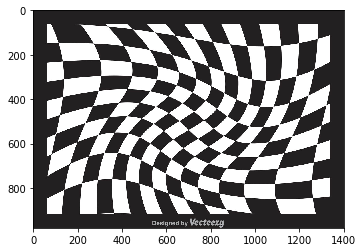

In [61]:
checkers_board = cv2.imread('images/distorted_checker_board.jpg')
checkers_board = cv2.cvtColor(checkers_board,cv2.COLOR_BGR2RGB)
plt.imshow(checkers_board)

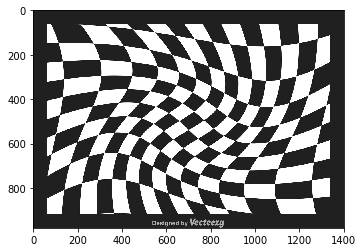

In [62]:
gray_checkers_board = cv2.cvtColor(checkers_board,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_checkers_board,cmap='gray')

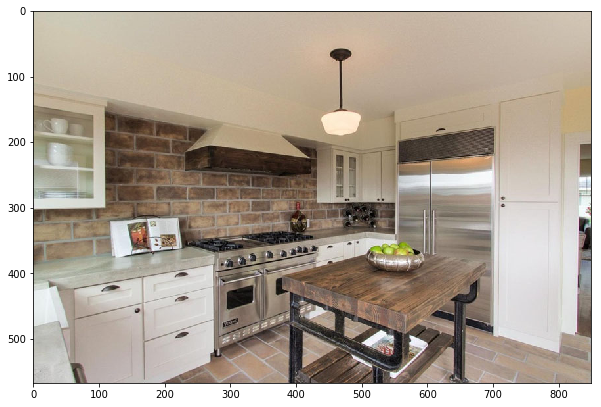

In [63]:
kitchen_corners = cv2.imread('images/kitchen-cabinets-corners.jpg')
kitchen_corners = cv2.cvtColor(kitchen_corners,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(kitchen_corners)

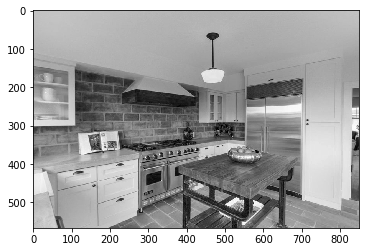

In [20]:
gray_kitchen_corners = cv2.cvtColor(kitchen_corners,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_kitchen_corners,cmap='gray')

## Harris Corner Detection

**cornerHarris Function**

*  src Input single-channel 8-bit or floating-point image.
*  dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
*  blockSize Neighborhood size (see the details on #cornerEigenValsAndVecs ).
*  ksize Aperture parameter for the Sobel operator.
*  k Harris detector free parameter. See the formula in DocString
*  borderType Pixel extrapolation method. See #BorderTypes.

In [40]:
def corner_harris(orig_img, gray_img):
    # Convert Gray Scale Image to Float Values
    gray = np.float32(gray_img)

    # Corner Harris Detection
    dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

    # result is dilated for marking the corners, not important to actual corner detection
    # this is just so we can plot out the points on the image shown
    dst = cv2.dilate(dst,None)

    # Threshold for an optimal value, it may vary depending on the image.
    orig_img[dst>0.01*dst.max()]=[255,0,0]
    plt.figure(figsize=(10,10))
    plt.imshow(orig_img)

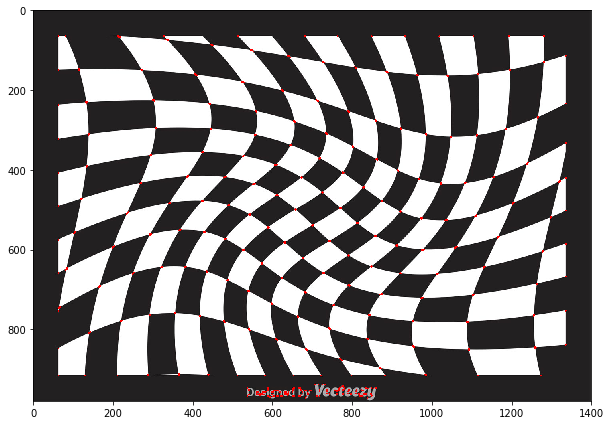

In [41]:
corner_harris(checkers_board, gray_checkers_board)

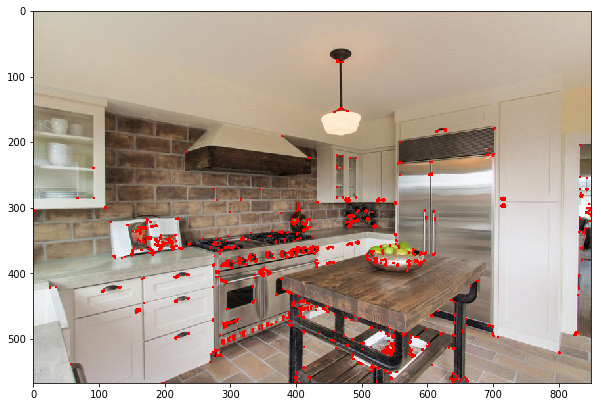

In [42]:
corner_harris(kitchen_corners, gray_kitchen_corners)

-----

## Shi-Tomasi Corner Detector & Good Features to Track Paper

goodFeatureToTrack Function Parameters:

* image Input 8-bit or floating-point 32-bit, single-channel image.
* corners Output vector of detected corners.
* maxCorners Maximum number of corners to return. If there are more corners than are found,the strongest of them is returned. `maxCorners <= 0` implies that no limit on the maximum is set and all detected corners are returned.
* qualityLevel Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure, which is the minimal eigenvalue (see #cornerMinEigenVal ) or the Harris function response (see #cornerHarris ). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the qualityLevel=0.01 , then all the corners with the quality measure less than 15 are rejected.

In [67]:
checkers_board = cv2.imread('images/distorted_checker_board.jpg')
checkers_board = cv2.cvtColor(checkers_board,cv2.COLOR_BGR2RGB)

kitchen_corners = cv2.imread('images/kitchen-cabinets-corners.jpg')
kitchen_corners = cv2.cvtColor(kitchen_corners,cv2.COLOR_BGR2RGB)

gray_checkers_board = cv2.cvtColor(checkers_board,cv2.COLOR_BGR2GRAY)
gray_kitchen_corners = cv2.cvtColor(kitchen_corners,cv2.COLOR_BGR2GRAY)


In [80]:
def shi_tomasi(orig_img, gray_img, num_of_corners_to_detect):
    #run the function with defaults
    corners = cv2.goodFeaturesToTrack(gray_img, num_of_corners_to_detect,0.01, 10)
    #convert corners to integers
    corners = np.int0(corners)
    #drawing the circles/dots
    for i in corners:
        x,y = i.ravel()
        cv2.circle(orig_img,(x,y),3,255,-1)
    plt.figure(figsize=(10,10))
    plt.imshow(orig_img)

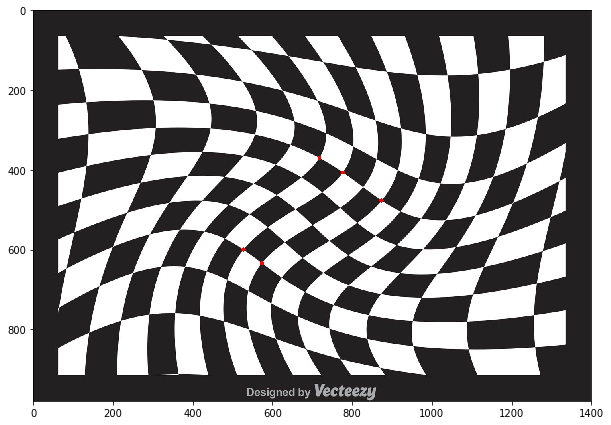

In [74]:
shi_tomasi(checkers_board.copy(), gray_checkers_board.copy(), 5)

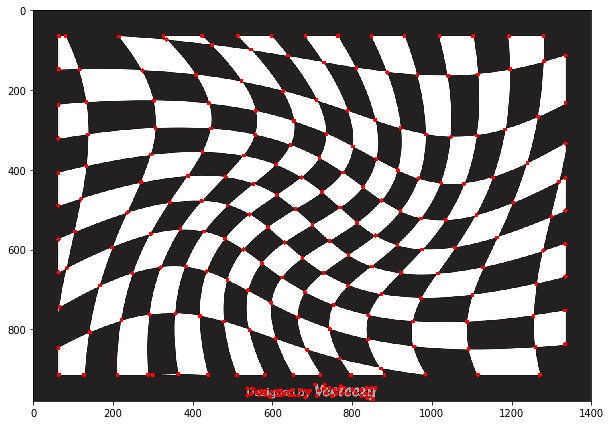

In [75]:
shi_tomasi(checkers_board.copy(), gray_checkers_board.copy(), 1000)

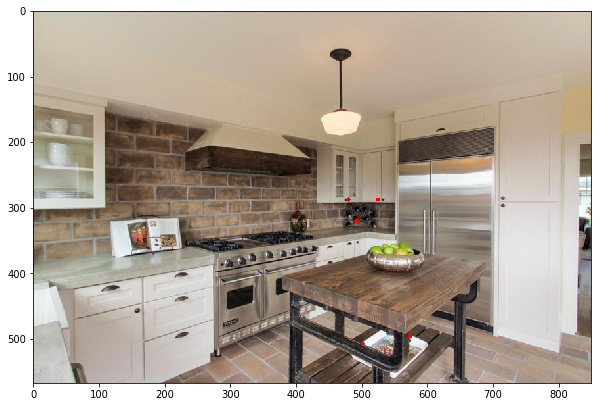

In [82]:
shi_tomasi(kitchen_corners.copy(), gray_kitchen_corners.copy(), 5)

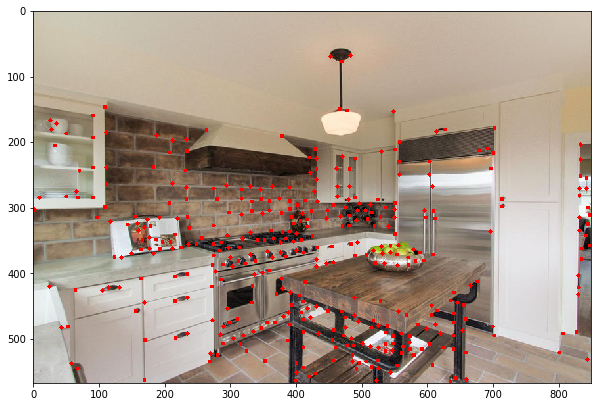

In [85]:
shi_tomasi(kitchen_corners.copy(), gray_kitchen_corners.copy(), 400)